In [3]:
import pandas as pd
dados = pd.read_csv("dadosAmbExterno.csv")
dados

,Data,Hora,Pressao Atmosferica,Temperatura
0,2024/05/07,09:53,957.6511,30.5261
1,2024/05/07,09:53,957.6496,30.5538
2,2024/05/07,09:53,957.6395,30.5791
3,2024/05/07,09:53,957.6329,30.6057
4,2024/05/07,09:53,957.6193,30.6320
...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801
17173,2024/05/08,09:52,958.4783,34.3153
17174,2024/05/08,09:52,958.4841,34.3571
17175,2024/05/08,09:52,958.4869,34.3978


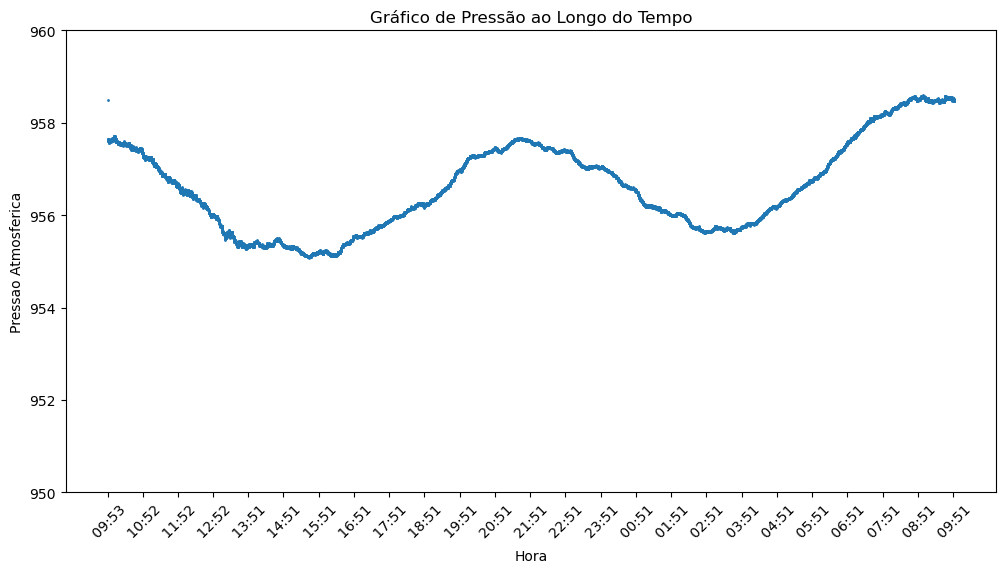

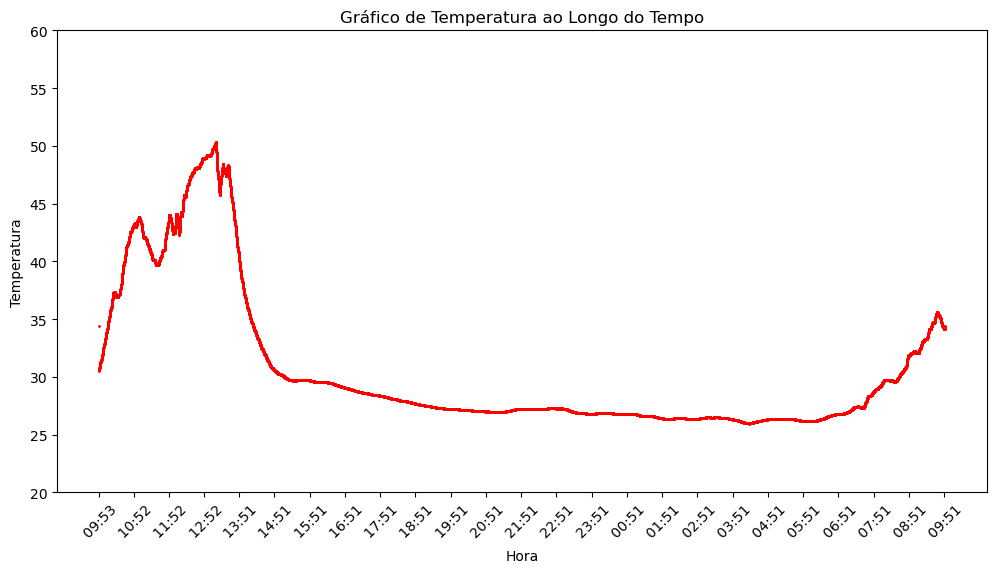

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) # Dimensões da figura

limite_inferior_Y = 950
limite_superior_Y = 960

#Configurações para uma melhor visualização
plt.scatter(dados["Hora"], dados["Pressao Atmosferica"], s = 1)
plt.xlabel("Hora") # Hora como eixo X do gráfico
plt.ylabel("Pressao Atmosferica") # Pressão Atmosférica como eixo Y do gráfico
plt.title("Gráfico de Pressão ao Longo do Tempo")
plt.xticks(rotation=45)
plt.ylim(limite_inferior_Y, limite_superior_Y)

#Filtragem dos horários em 11 amostras
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 24  
plt.xticks(dados["Hora"][::intervalo])

#Visualização da figura
plt.show()



# Agora, será configurado a gráfico com a Temperatura

plt.figure(figsize=(12, 6)) # Dimensões da figura

lim_inferior_Y = 20
lim_superior_Y = 60

#Configurações para uma melhor visualização
plt.scatter(dados["Hora"], dados["Temperatura"], color = 'red', s = 1)
plt.xlabel("Hora") # Hora como eixo X do gráfico
plt.ylabel("Temperatura") # Pressão Atmosférica como eixo Y do gráfico
plt.title("Gráfico de Temperatura ao Longo do Tempo")
plt.xticks(rotation=45)
plt.ylim(lim_inferior_Y, lim_superior_Y)

#Filtragem dos horários em 11 amostras
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 24 
plt.xticks(dados["Hora"][::intervalo])

#Visualização da figura
plt.show()

## Utilizando a Pressão e a Temperatura para o Cálculo da Altitude

#### * Fórmula barométrica / Primeira Fórmula

Muitas são as abordagens adotadas para encontrar a Altitude através do uso da Pressão atmosférica e Temperatura. De uma forma geral, esse estudo visa encontrar qual a melhor estratégia a ser adotada, em termos de estabilidade e confiança nos resultados. Fazendo uso também, de gráficos e métricas que tragam o método mais plausível para a aplicação.

![Fórmula de Altitude a partir da Fórmula Barométrica](images\Capturar.PNG)


Na fórmula barométrica descrita acima, tem-se:
* h = Altitude
* P = Pressão Medida
* Po = Pressão Referencial, à nivel do mar

Nota-se que sem a presença da temperatura não há como acontecer o balanceamento dos valores mensurados.

In [6]:
import math 

altitude_sem_temp = [] # lista que virá a ser uma coluna do DataFrame

po = 1013.25 # pressão à nivel do mar

for i in range(0, len(dados["Pressao Atmosferica"])):
    pressaoN = dados["Pressao Atmosferica"].iloc[i]
    altitude = 44330.0 * (1.0 - ((pressaoN) / po) ** (1.0 / 5.255))
    altitude_sem_temp.append(round(altitude, 2))

dados['Altitude Primeira fórmula(S/T)'] = altitude_sem_temp

# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica,Temperatura,Altitude Primeira fórmula(S/T)
0,2024/05/07,09:53,957.6511,30.5261,473.52
1,2024/05/07,09:53,957.6496,30.5538,473.54
2,2024/05/07,09:53,957.6395,30.5791,473.62
3,2024/05/07,09:53,957.6329,30.6057,473.68
4,2024/05/07,09:53,957.6193,30.6320,473.80
...,...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801,466.32
17173,2024/05/08,09:52,958.4783,34.3153,466.32
17174,2024/05/08,09:52,958.4841,34.3571,466.27
17175,2024/05/08,09:52,958.4869,34.3978,466.24


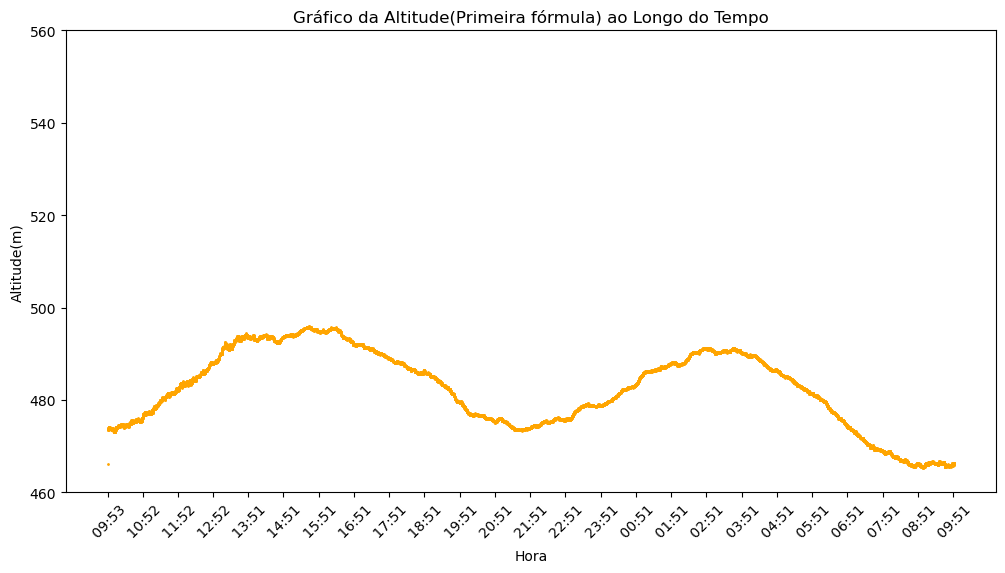

In [13]:
import os

# Verifica se o diretório existe
if not os.path.exists("image/"):
    # Cria o diretório se não existir
    os.makedirs("image/")

# Agora, iremos imprimir o gráfico com o resultado da altitude sem a temperatura

plt.figure(figsize=(12, 6)) # Dimensões da figura

lim_inferior_Y = 460
lim_superior_Y = 560

#Configurações para uma melhor visualização
plt.scatter(dados["Hora"], dados["Altitude Primeira fórmula(S/T)"], color = 'orange', s = 1)
# plt.plot(dados[" Hora"], dados["Altitude Sem Temperatura(m)"], color = 'orange', linestyle='--', linewidth=1.0)
plt.xlabel("Hora") # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)") # Pressão Atmosférica como eixo Y do gráfico
plt.title("Gráfico da Altitude(Primeira fórmula) ao Longo do Tempo")
plt.xticks(rotation=45)
plt.ylim(lim_inferior_Y, lim_superior_Y)

#Filtragem dos horários em 11 amostras
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 24  
plt.xticks(dados["Hora"][::intervalo])

#Visualização da figura
plt.savefig("image/" + "grafico_altitude_1.png")
plt.show()

In [160]:
maximo = dados["Altitude Primeira fórmula(S/T)"].max()
minimo = dados["Altitude Primeira fórmula(S/T)"].min()
diferenca = maximo - minimo

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximo)
print("Mínimo:", minimo)
print("Diferença: {:.2f}".format(diferenca))

Máximo: 495.93
Mínimo: 465.33
Diferença: 30.60


#### * Fórmula Hipsométrica / Segunda Fórmula


![Fórmula de Altitude a partir da Fórmula Hipsométrica](images\Capturar3.PNG)


Além das variáveis descritas na fórmula barométrica, nessa fórmula há a presença também da temperatura

* T = Temperatura em Celsius

In [14]:
import math 

altitude_com_temp = [] # lista que virá a ser uma coluna do DataFrame

po = 1013.25 # pressão à nivel do mar

for i in range(0, len(dados["Pressao Atmosferica"])):
    pressaoN = dados["Pressao Atmosferica"].iloc[i]
    tempN = dados["Temperatura"].iloc[i]
    
    altitude = (((pressaoN / po) ** (1 / 5.255) - 1) * (tempN + 273.15) / 0.0065) * -1
    altitude_com_temp.append(round(altitude, 2))

dados['Altitude Segunda fórmula(C/T)'] = altitude_com_temp

# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica,Temperatura,Altitude Primeira fórmula(S/T),Altitude Segunda fórmula(C/T)
0,2024/05/07,09:53,957.6511,30.5261,473.52,499.05
1,2024/05/07,09:53,957.6496,30.5538,473.54,499.11
2,2024/05/07,09:53,957.6395,30.5791,473.62,499.24
3,2024/05/07,09:53,957.6329,30.6057,473.68,499.34
4,2024/05/07,09:53,957.6193,30.6320,473.80,499.51
...,...,...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801,466.32,497.53
17173,2024/05/08,09:52,958.4783,34.3153,466.32,497.58
17174,2024/05/08,09:52,958.4841,34.3571,466.27,497.60
17175,2024/05/08,09:52,958.4869,34.3978,466.24,497.64


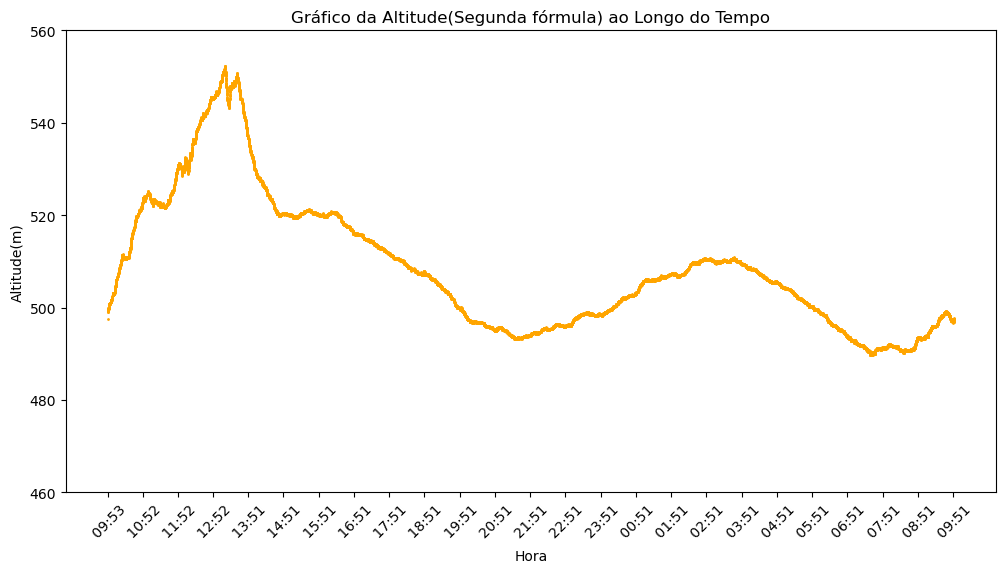

In [15]:
# Agora, iremos imprimir o gráfico com o resultado da altitude com a temperatura

plt.figure(figsize=(12, 6)) # Dimensões da figura

lim_inferior_Y = 460
lim_superior_Y = 560

#Configurações para uma melhor visualização
plt.scatter(dados["Hora"], dados["Altitude Segunda fórmula(C/T)"], color = 'orange', s = 1)
# plt.plot(dados[" Hora"], dados["Altitude Sem Temperatura(m)"], color = 'orange', linestyle='--', linewidth=1.0)
plt.xlabel("Hora") # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)") # Pressão Atmosférica como eixo Y do gráfico
plt.title("Gráfico da Altitude(Segunda fórmula) ao Longo do Tempo")
plt.xticks(rotation=45)
plt.ylim(lim_inferior_Y, lim_superior_Y)

#Filtragem dos horários em 11 amostras
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 24  
plt.xticks(dados["Hora"][::intervalo])

#Visualização da figura
plt.savefig("image/" + "grafico_altitude_2.png")
plt.show()

In [163]:
maximoTemp = dados["Altitude Segunda fórmula(C/T)"].max()
minimoTemp = dados["Altitude Segunda fórmula(C/T)"].min()
diferencaTemp = maximoTemp - minimoTemp

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximoTemp)
print("Mínimo:", minimoTemp)
print("Diferença: {:.2f}".format(diferencaTemp))

Máximo: 552.28
Mínimo: 489.67
Diferença: 62.61


#### * Fórmula da Altitude / Terceira Fórmula


![Fórmula de Altitude a partir da Fórmula Hipsométrica](images\Capturar2.PNG)


In [164]:
import math 

altitude_com_temp = [] # lista que virá a ser uma coluna do DataFrame

# pressão à nivel do mar
po = 1013.25
# temperatura padrão a nível do mar
to = 15
# constante universal do gás
r = 8.31432
#lapso de temperatura padrao
l = -0.0065
 #constante da aceleração da gravidade
g = 9.80665
 #constante de massa molar do ar da terra
m = 0.0289644

for i in range(0, len(dados["Pressao Atmosferica"])):
    pressaoN = dados["Pressao Atmosferica"].iloc[i]
    tempN = dados["Temperatura"].iloc[i]
    altitude = (to/l) * (((pressaoN/po)**((-r*l)/(g*m))) - 1)
    altitude_com_temp.append(round(altitude, 2))
dados['Altitude Terceira fórmula(S/T)'] = altitude_com_temp

# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica,Temperatura,Altitude Primeira fórmula(S/T),Altitude Segunda fórmula(C/T),Altitude Terceira fórmula(S/T)
0,2024/05/07,09:53,957.6511,30.5261,473.52,499.05,24.65
1,2024/05/07,09:53,957.6496,30.5538,473.54,499.11,24.65
2,2024/05/07,09:53,957.6395,30.5791,473.62,499.24,24.65
3,2024/05/07,09:53,957.6329,30.6057,473.68,499.34,24.65
4,2024/05/07,09:53,957.6193,30.6320,473.80,499.51,24.66
...,...,...,...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801,466.32,497.53,24.27
17173,2024/05/08,09:52,958.4783,34.3153,466.32,497.58,24.27
17174,2024/05/08,09:52,958.4841,34.3571,466.27,497.60,24.27
17175,2024/05/08,09:52,958.4869,34.3978,466.24,497.64,24.27


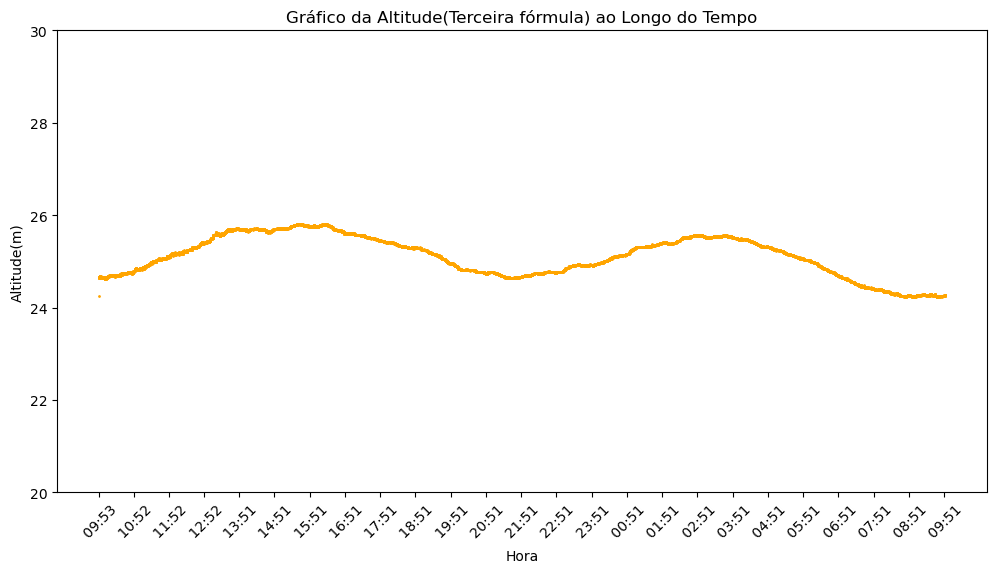

In [151]:
# Agora, iremos imprimir o gráfico com o resultado da altitude com a temperatura

plt.figure(figsize=(12, 6)) # Dimensões da figura

lim_inferior_Y = 20
lim_superior_Y = 30

#Configurações para uma melhor visualização
plt.scatter(dados["Hora"], dados["Altitude Terceira fórmula(S/T)"], color = 'orange', s = 1)
# plt.plot(dados[" Hora"], dados["Altitude Sem Temperatura(m)"], color = 'orange', linestyle='--', linewidth=1.0)
plt.xlabel("Hora") # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)") # Pressão Atmosférica como eixo Y do gráfico
plt.title("Gráfico da Altitude(Terceira fórmula) ao Longo do Tempo")
plt.xticks(rotation=45)
plt.ylim(lim_inferior_Y, lim_superior_Y)

#Filtragem dos horários em 11 amostras
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 24 
plt.xticks(dados["Hora"][::intervalo])

#Visualização da figura
plt.show()

#### * Fórmula da Altitude / Quarta Fórmula


In [165]:
import math 

altitude_com_temp = [] # lista que virá a ser uma coluna do DataFrame

# pressão à nivel do mar
po = 1013.25
# temperatura padrão a nível do mar
to = 15
# constante universal do gás
r = 8.31432
#lapso de temperatura padrao
l = -0.0065
 #constante da aceleração da gravidade
g = 9.80665
 #constante de massa molar do ar da terra
m = 0.0289644

for i in range(0, len(dados["Pressao Atmosferica"])):
    pressaoN = dados["Pressao Atmosferica"].iloc[i]
    tempN = dados["Temperatura"].iloc[i]
    altitude = (po / pressaoN);
    altitude = pow(altitude, (1 / 5.25588)) - 1.0
    altitude = (altitude * (tempN + 273)) / 0.0065
    altitude_com_temp.append(round(altitude, 2))
dados['Altitude Quarta fórmula(C/T)'] = altitude_com_temp

# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica,Temperatura,Altitude Primeira fórmula(S/T),Altitude Segunda fórmula(C/T),Altitude Terceira fórmula(S/T),Altitude Quarta fórmula(C/T)
0,2024/05/07,09:53,957.6511,30.5261,473.52,499.05,24.65,504.10
1,2024/05/07,09:53,957.6496,30.5538,473.54,499.11,24.65,504.16
2,2024/05/07,09:53,957.6395,30.5791,473.62,499.24,24.65,504.30
3,2024/05/07,09:53,957.6329,30.6057,473.68,499.34,24.65,504.40
4,2024/05/07,09:53,957.6193,30.6320,473.80,499.51,24.66,504.58
...,...,...,...,...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801,466.32,497.53,24.27,502.48
17173,2024/05/08,09:52,958.4783,34.3153,466.32,497.58,24.27,502.54
17174,2024/05/08,09:52,958.4841,34.3571,466.27,497.60,24.27,502.56
17175,2024/05/08,09:52,958.4869,34.3978,466.24,497.64,24.27,502.60


In [166]:
maximoTemp = dados["Altitude Quarta fórmula(C/T)"].max()
minimoTemp = dados["Altitude Quarta fórmula(C/T)"].min()
diferencaTemp = maximoTemp - minimoTemp

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximoTemp)
print("Mínimo:", minimoTemp)
print("Diferença: {:.2f}".format(diferencaTemp))

Máximo: 558.12
Mínimo: 494.58
Diferença: 63.54


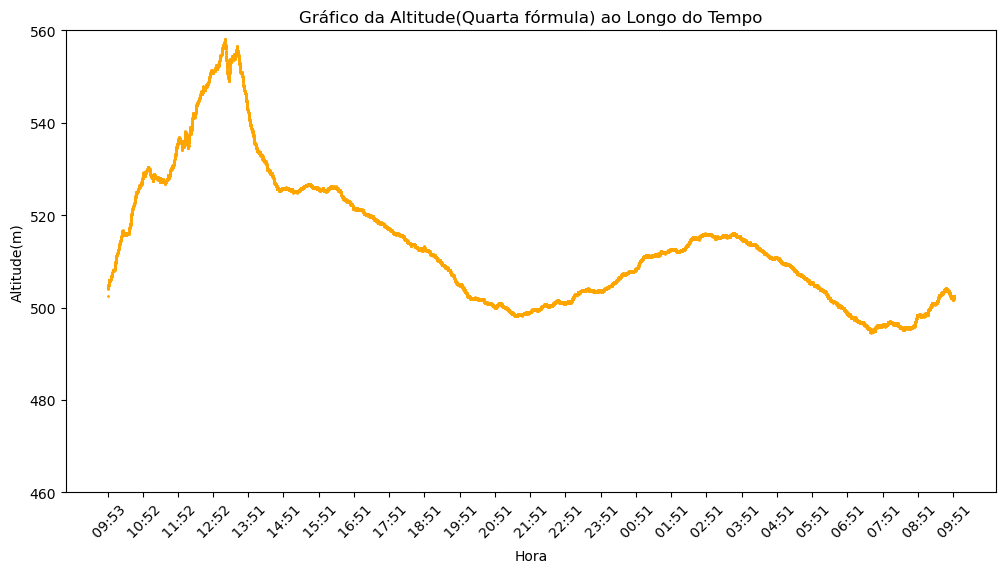

In [167]:
# Agora, iremos imprimir o gráfico com o resultado da altitude com a temperatura

plt.figure(figsize=(12, 6)) # Dimensões da figura

lim_inferior_Y = 460
lim_superior_Y = 560

#Configurações para uma melhor visualização
plt.scatter(dados["Hora"], dados["Altitude Quarta fórmula(C/T)"], color = 'orange', s = 1)
# plt.plot(dados[" Hora"], dados["Altitude Sem Temperatura(m)"], color = 'orange', linestyle='--', linewidth=1.0)
plt.xlabel("Hora") # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)") # Pressão Atmosférica como eixo Y do gráfico
plt.title("Gráfico da Altitude(Quarta fórmula) ao Longo do Tempo")
plt.xticks(rotation=45)
plt.ylim(lim_inferior_Y, lim_superior_Y)

#Filtragem dos horários em 11 amostras
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 24 
plt.xticks(dados["Hora"][::intervalo])

#Visualização da figura
plt.show()

## Comparação de ambas as abordagens

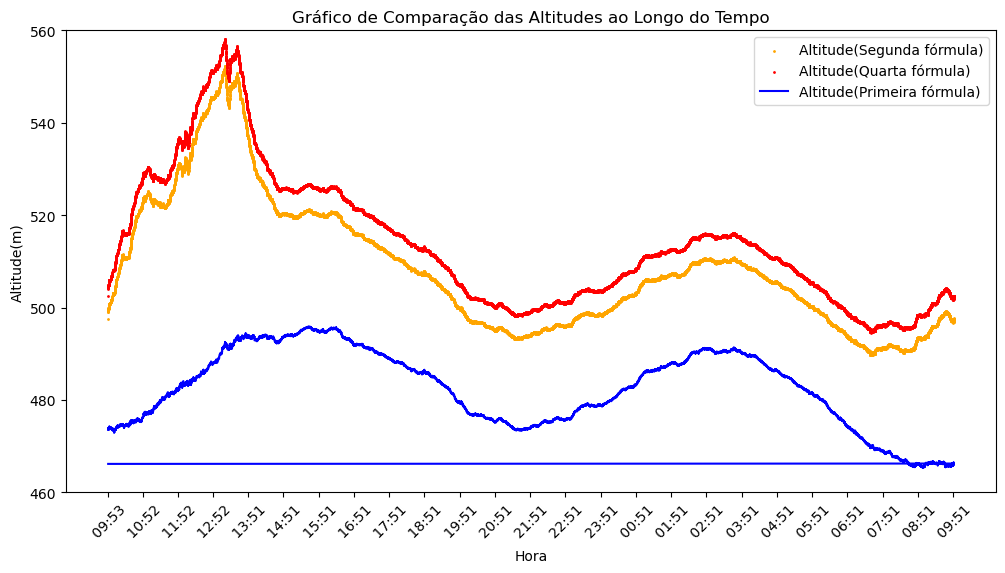

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Dimensões da figura

lim_inferior_Y = 460
lim_superior_Y = 560

# Plotando a altitude com temperatura - Segunda fórmula
plt.scatter(dados["Hora"], dados["Altitude Segunda fórmula(C/T)"], color='orange', label='Altitude(Segunda fórmula)', s=1)

# Plotando a altitude com temperatura - Quarta fórmula
plt.scatter(dados["Hora"], dados["Altitude Quarta fórmula(C/T)"], color='red', label='Altitude(Quarta fórmula)', s=1)

# Plotando a linha correspondente à altitude sem temperatura - Primeira fórmula
plt.plot(dados["Hora"], dados["Altitude Primeira fórmula(S/T)"], color='blue', linestyle='-', label='Altitude(Primeira fórmula)')

plt.xlabel("Hora")  # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)")  # Altitude como eixo Y do gráfico
plt.title("Gráfico de Comparação das Altitudes ao Longo do Tempo")

# Definindo limites e intervalos do eixo X
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 24
plt.xticks(dados["Hora"][::intervalo], rotation=45)

plt.ylim(lim_inferior_Y, lim_superior_Y)
plt.legend()
plt.show()


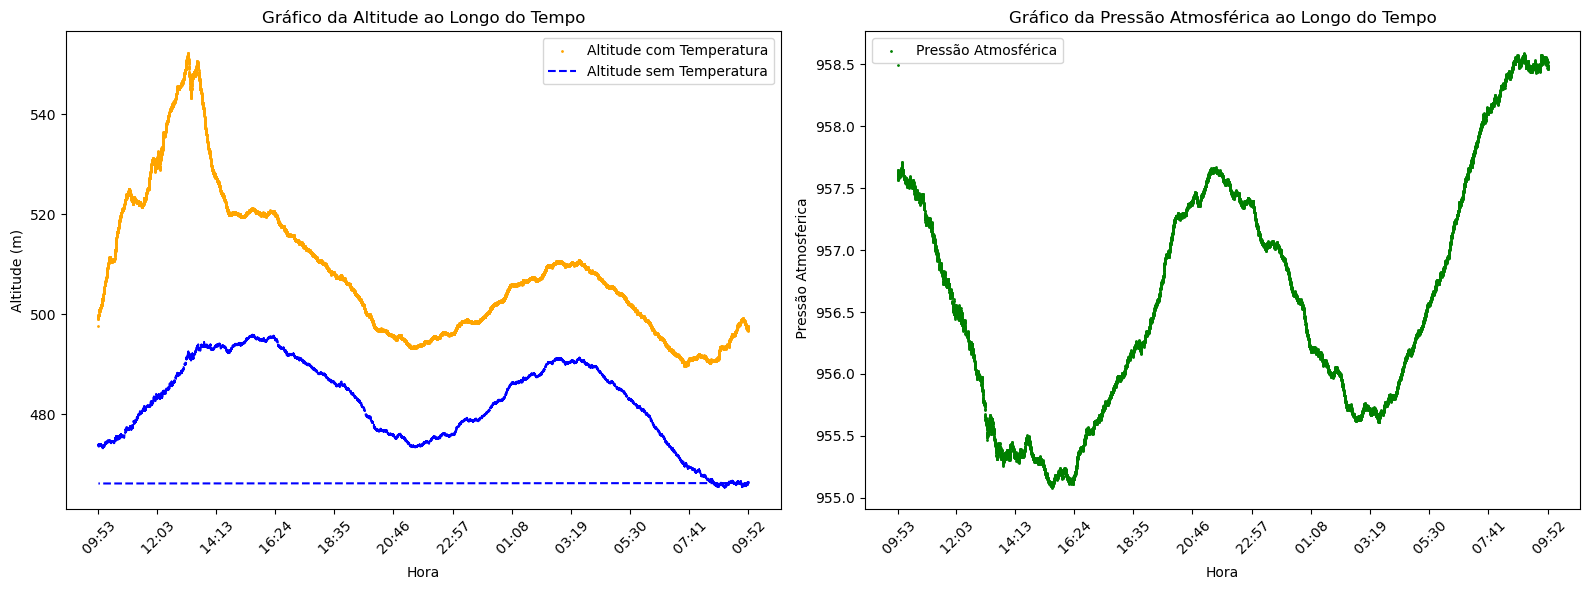

In [147]:
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
plt.figure(figsize=(16, 6))  # Ajuste o tamanho conforme desejado

# Subplot para o gráfico da altitude
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro subplot
plt.scatter(dados["Hora"], dados["Altitude Segunda fórmula(C/T)"], color='orange', label='Altitude com Temperatura', s=1)
plt.plot(dados["Hora"], dados["Altitude Primeira fórmula(S/T)"], color='blue', linestyle='--', label='Altitude sem Temperatura')
plt.xlabel("Hora")
plt.ylabel("Altitude (m)")
plt.title("Gráfico da Altitude ao Longo do Tempo")
plt.xticks(rotation=45)
plt.legend()

total_pontos = len(dados["Hora"])
intervalo = total_pontos // 11
plt.xticks(dados["Hora"][::intervalo], rotation=45)

# Subplot para o gráfico da pressão
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo subplot
plt.scatter(dados["Hora"], dados["Pressao Atmosferica"], color='green', label='Pressão Atmosférica', s=1)
plt.xlabel("Hora")
plt.ylabel(" Pressão Atmosferica")
plt.title("Gráfico da Pressão Atmosférica ao Longo do Tempo")
plt.xticks(rotation=45)
plt.legend()

total_pontos = len(dados["Hora"])
intervalo = total_pontos // 11
plt.xticks(dados["Hora"][::intervalo], rotation=45)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Exibindo os subplots
plt.show()
